# Exercise: Polynomial Regression and KNN


A) Use the Auto dataset, find the $R^2$ score of a linear regression model that predicts the miles per gallon (mpg) from the horsepower.

Hints:

    Create model object using: model=LinearRegression()

    Fit the model: fitted_model=model.fit(X_train,Y_train)

    Find the R squared metric using: fitted_model.score(X_test,Y_test)


The  0.62176588114


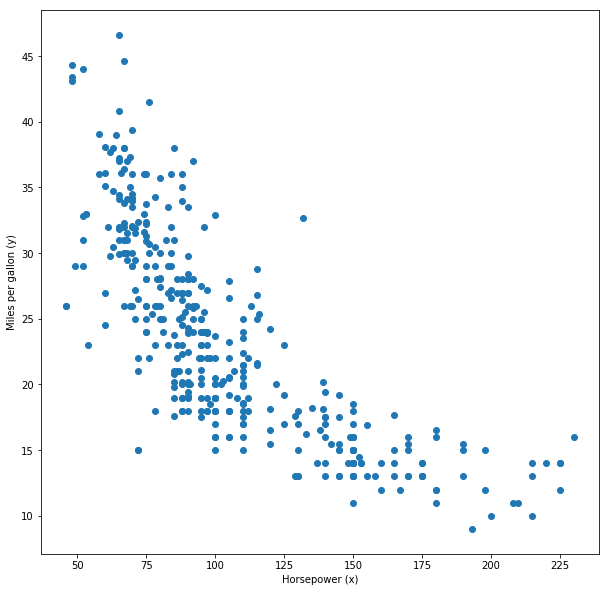

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

AutoData=read_csv('Auto_modify.csv') # read the data

X_auto_hp=AutoData.horsepower.values.reshape(-1,1) # define features: horsepower 
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1) # define label: miles per gallon

#ploting the data points
plt.figure(figsize=(10,10))
plt.scatter(X_auto_hp, Y_auto_mpg, marker= 'o')
plt.xlabel('Horsepower (x)')
plt.ylabel('Miles per gallon (y)')

#Split to train and test
X_train, X_test, Y_train, Y_test= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)

# continue your code here
lm = LinearRegression()
model = lm.fit(X_train, Y_train)                    


print("The ",model.score(X_test,Y_test))


B) Use polynomial regression to include both the horsepower feature and $(horsepower)^2$ in the regression model. Find the $R^2$ metric. 

Hint: You can use [numpy.concatenate](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html). For example to add to an array U a column vector $W^2$, we can use X=np.concatenate((U,W**2),axis=1)


C) Optional: repeat (B) increase the degree of the polynomial to 3,then 4, then 5 and check the accuracy in each case.


In [39]:
# write code here
import numpy as np
Y= AutoData.mpg.values.reshape(-1,1)
X1 = AutoData.horsepower.values.reshape(-1,1)
X2 = X1**2
X= np.concatenate((X1,X2), axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
lm = LinearRegression()
model = lm.fit(X_train, Y_train)
print("The score with horsepower and horsepower^2 as predictors", model.score(X_test,Y_test))


The score with horsepower and horsepower^2 as predictors 0.727103150464


In [40]:
import numpy as np
Y= AutoData.mpg.values.reshape(-1,1)
X1 = AutoData.horsepower.values.reshape(-1,1)
for i in range (3,6):
    X2 = X1**i
    X= np.concatenate((X1,X2), axis=1)
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state= 0)
    lm = LinearRegression()
    model = lm.fit(X_train, Y_train)
    print("The score with horsepower and horsepower^",i, "as predictors is", model.score(X_test,Y_test))

The score with horsepower and horsepower^ 3 as predictors is 0.722640633343
The score with horsepower and horsepower^ 4 as predictors is 0.716289682568
The score with horsepower and horsepower^ 5 as predictors is 0.709686560629


D) Use KNN regression to predict the miles per gallon(mpg) with K=7, and find $R^2$ metric in the following cases 

- One feature: Horsepower only

- Two features: horsepower and (horsepower)2 

Hint: 

    Create KNN regression object using neighbors.KNeighborsRegressor:

    knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)

    Use the .fit and .score methods as before

E) COMMENT on your results: which model performs better? How does performance change when adding the quadratic feature?


In [45]:
from sklearn import neighbors
# add you code here
X_auto_hp=AutoData.horsepower.values.reshape(-1,1) # define features: horsepower 
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1)
X1 = AutoData.horsepower.values.reshape(-1,1)
X2 = X1**2
X= np.concatenate((X1,X2), axis=1)
X_train, X_test, Y_train, Y_test= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)
X_train1, X_test1, Y_train1, Y_test1= train_test_split(X, Y_auto_mpg, random_state= 0)
knn_model = neighbors.KNeighborsRegressor(n_neighbors =7)
knn_model.fit(X_train, Y_train)
print("The score for KNN model with one feature horsepower is ", knn_model.score(X_test, Y_test) )
knn_model1 = neighbors.KNeighborsRegressor(n_neighbors =7)
knn_model1.fit(X_train1, Y_train1)
print("The score for KNN model with two features horsepower and horsepower^2 is ", knn_model1.score(X_test1, Y_test1) )

The score for KNN model with one feature horsepower is  0.667477744171
The score for KNN model with two features horsepower and horsepower^2 is  0.670108404882
